<a href="https://colab.research.google.com/github/Seunsoipe/Deep-Learning/blob/main/CNN_Checkpoint_(Happy_house)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

We will solve the Happy House problem where we allow a person to enter the house only if he/she is smiling! So, a smile detector!

In [ ]:
#Import neccessary Libraries

!pip install pydot

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
#Specify the train and test dataset

train_ = h5py.File('train_happy.h5') 
test_ = h5py.File('test_happy.h5')

In [ ]:
X_train = train_['train_set_x']
y_train = train_['train_set_y']
X_test = test_['test_set_x']
y_test = test_['test_set_y']

y_test

<HDF5 dataset "test_set_y": shape (150,), type "<i8">

In [ ]:
#Let's Convert type

X_test = np.array(X_test[:])
X_train = np.array(X_train[:])
y_test = np.array(y_test[:])
y_train = np.array(y_train[:])
y_train.shape
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
#Lets reshape

y_train = y_train.reshape((X_train.shape[0], 1))#reshape((1, y_train.shape[0]))
y_test = y_test.reshape((y_test.shape[0], 1))  #reshape((1, y_test.shape[0]))
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
# Re-scale the image data to values between [0,1] (Normalizing image Vectors)

X_train = X_train.astype('float32') / 255 # changing the images to 0 and 1
X_test = X_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 3) # This is to match the image last column size
y_test = to_categorical(y_test, 3)
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
#Let's split 

from sklearn.model_selection import train_test_split

train_data, val_data,train_labels,  val_labels = train_test_split(X_train, y_train, test_size=0.1, random_state=30)

In [ ]:
#Let's see the shape informations

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 3)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 3)


Image shape : (64, 64, 3)


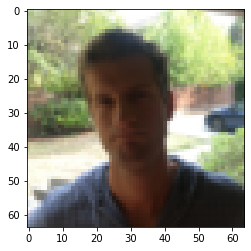

In [ ]:
# Let's see a sample image from dataset

print("Image shape :",X_train[10].shape)
imshow(X_train[10])



## Model Building

In [ ]:
model = Sequential([
                    Conv2D(filters=4, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(64, 64, 3)),
                    MaxPooling2D(pool_size=(2,2)), 
                    Conv2D(filters=4, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=2, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPooling2D(pool_size=(2,2)), 
                    Flatten(), # we flattern bcos we are going to have a dense layer
                    # Densely connected layers
                    Dense(64, activation='relu'),
                    # output layer
                    Dense(3, activation='softmax')
                                             ])

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(train_data, train_labels, epochs = 12, batch_size=1,
                          validation_data=(val_data, val_labels))


Epoch 1/12
540/540 [==============================] - 8s 10ms/step - loss: 0.4719 - accuracy: 0.5222 - val_loss: 0.4354 - val_accuracy: 0.7667
Epoch 2/12
540/540 [==============================] - 4s 7ms/step - loss: 0.3952 - accuracy: 0.7093 - val_loss: 0.3018 - val_accuracy: 0.7833
Epoch 3/12
540/540 [==============================] - 3s 5ms/step - loss: 0.2776 - accuracy: 0.7981 - val_loss: 0.2663 - val_accuracy: 0.7833
Epoch 4/12
540/540 [==============================] - 3s 5ms/step - loss: 0.1957 - accuracy: 0.8815 - val_loss: 0.1684 - val_accuracy: 0.8833
Epoch 5/12
540/540 [==============================] - 3s 5ms/step - loss: 0.1520 - accuracy: 0.9148 - val_loss: 0.0978 - val_accuracy: 0.9500
Epoch 6/12
540/540 [==============================] - 3s 6ms/step - loss: 0.1307 - accuracy: 0.9241 - val_loss: 0.0866 - val_accuracy: 0.9500
Epoch 7/12
540/540 [==============================] - 3s 5ms/step - loss: 0.1005 - accuracy: 0.9426 - val_loss: 0.0740 - val_accuracy: 0.9667
Epoch

## Evaluation and Test

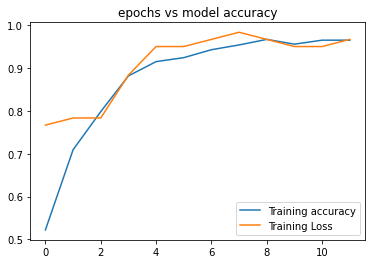

In [ ]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['val_accuracy']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs model accuracy')
plt.legend()

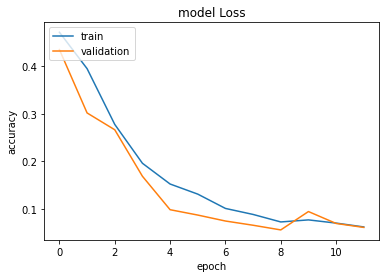

In [ ]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

150/150 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9467
Test loss: 0.1002 accuracy: 0.9467


In [ ]:
#Let's Predict

y_predict = model.predict(X_test)
y_predict = (y_predicting > 0.5)

5/5 [==============================] - 0s 20ms/step


In [ ]:
y_predict

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [Fa

In [ ]:
y_test = (y_test > 0.5)

print(np.argmax(y_test, axis = 1))

[1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1
 1 0]


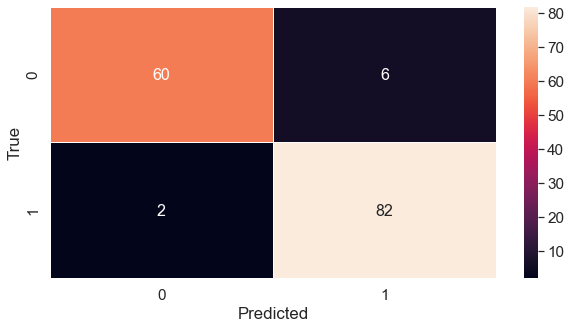

In [ ]:
cm = confusion_matrix((np.argmax(y_test, axis = 1)), (np.argmax(y_predict, axis=1)))
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
text_label = ['Not Happy', 'Happy']


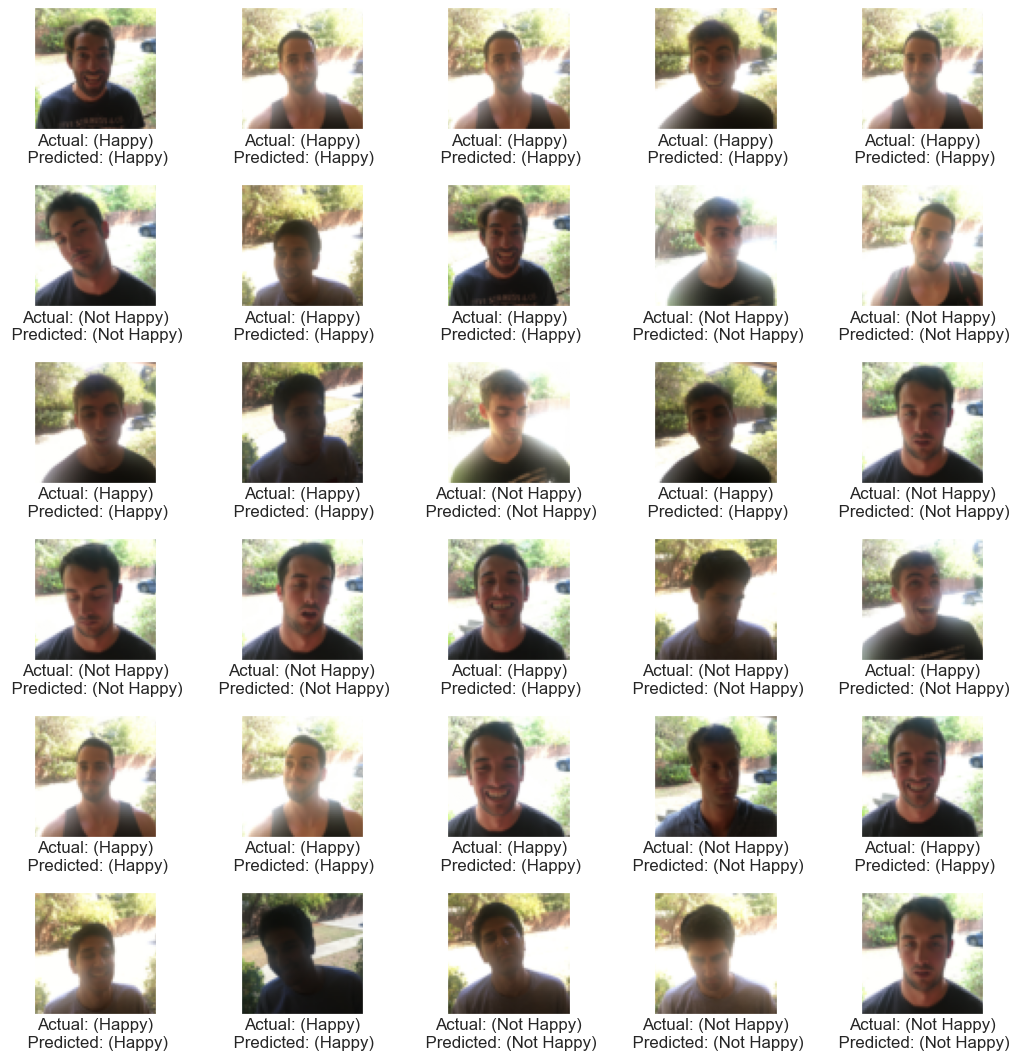

In [ ]:
# Another view, showing 30 randomly selected images at a time
plt.figure(figsize=(15,15)) # setting the size of the image
for i in range(30): # indicating number of images to show
    plt.subplot(6, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 149)
    plt.imshow(X_test[img_index], cmap=plt.cm.gray)
    # plt.xlabel(text_label[np.argmax(y_test, axis = 1)[img_index]])
    # plt.xlabel(text_label[np.argmax(y_predicting, axis = 1)[img_index]])

    plt.xlabel("Actual: ({})\n Predicted: ({})".format(
        text_label[np.argmax(y_test, axis = 1)[img_index]], text_label[np.argmax(y_predict, axis = 1)[img_index]]))
    
    
plt.tight_layout()
plt.show()